# Mở màn

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

In [223]:
df = pd.read_csv("/content/Diet_R.csv")
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


In [224]:
# Trích thông tin của tập dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        76 non-null     float64
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 4.4 KB


Vì Person 25 và 26 thiếu dữ liệu ở cột gender -> loại bỏ để tiến hành thống kê suy diễn

In [6]:
df = df.drop([0, 1])
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


Sắp xếp lại thứ tự

In [15]:
df = df.set_index('Person')
df = df.sort_index()
df

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0.0,22,159,58,1,54.2
2,0.0,46,192,60,1,54.0
3,0.0,55,170,64,1,63.3
4,0.0,33,171,64,1,61.1
5,0.0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1.0,35,183,83,3,80.2
75,1.0,49,177,84,3,79.9
76,1.0,28,164,85,3,79.7


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,76.0,0.434211,0.498946,0.0,0.00,0.00,1.000,1.0
Age,76.0,39.223684,9.908379,16.0,32.50,39.00,47.250,60.0
Height,76.0,170.776316,11.419981,141.0,163.75,169.00,175.250,201.0
pre.weight,76.0,72.289474,7.974653,58.0,66.00,72.00,78.000,88.0
Diet,76.0,2.039474,0.823663,1.0,1.00,2.00,3.000,3.0
weight6weeks,76.0,68.343421,8.058938,53.0,61.95,68.95,73.675,84.5


# **DIET DATA SET**

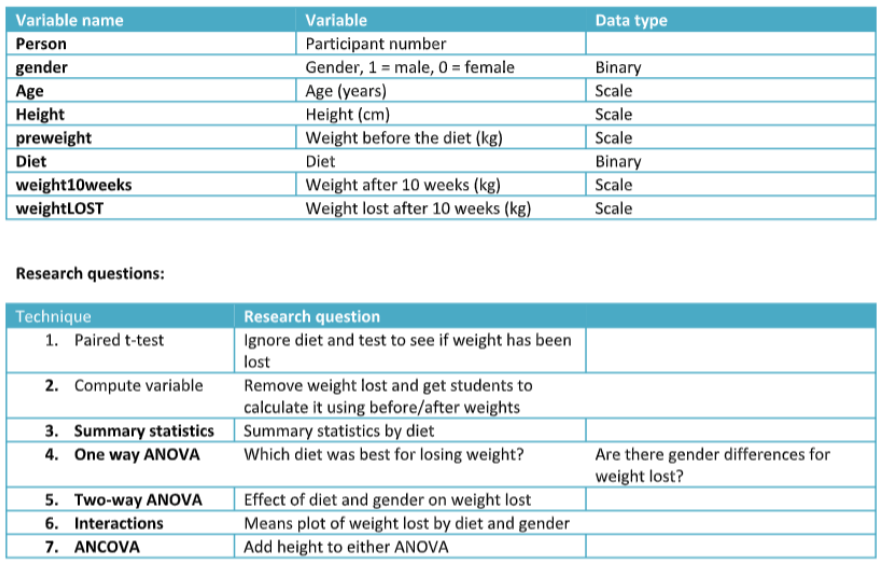

# **Paired t-test**
*Research question:* **Ignore diet and test to see if weight has been lost**

"Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa"

**Phát biểu giả thuyết:**

$H_0: μ_0 = μ_1$. Cân nặng trung bình của trước và sau sáu tuần là như nhau (Không giảm được cân)

$H_a: μ_0 \ne μ_1$. Cân nặng trung bình của trước và sau sáu tuần có sự khác nhau

In [269]:
truoc = df['pre.weight']
sau = df['weight6weeks']   
dg = truoc - sau
df['Đã giảm'] =  df['pre.weight'] - df['weight6weeks']

In [52]:
ss = pd.DataFrame(df, columns = ['pre.weight','weight6weeks','Đã giảm'])
ss

,pre.weight,weight6weeks,Đã giảm
2,58,54.2,3.8
3,60,54.0,6.0
4,64,63.3,0.7
5,64,61.1,2.9
6,65,62.2,2.8
...,...,...,...
73,83,80.2,2.8
74,84,79.9,4.1
75,85,79.7,5.3
76,87,77.8,9.2


In [53]:
#Xác định các thông số
null_mean = 76
alpha = 0.05

In [54]:
def results(p, vals=['mean_pre', 'mean_6w'], alpha=0.05):
    cols=['score', 'p_value', 'Kết luận']
    if p['p_value'] < alpha:
        p['Kết luận'] = f"Có bằng chứng bác bỏ giả thuyết H0"
    if p['p_value'] >= alpha:
        p['Kết luận'] = f"Chưa có bằng chứng để bác bỏ giả thuyết H0"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [55]:
from scipy import stats as st
p = {}
p['mean_pre'] = np.mean(truoc)
p['mean_6w'] = np.mean(sau)
p['score'], p['p_value'] = st.ttest_ind(truoc, sau)
print('Kết quả kiểm định t')
results(p)

Kết quả kiểm định t


,mean_pre,mean_6w,score,p_value,Kết luận
,72.289474,68.343421,3.034226,0.002843,Có bằng chứng bác bỏ giả thuyết H0


**Kết luận:** Cân nặng trước và sau 6 tuần có sự khác nhau.

Text(0.5, 1.0, 'Weight chart before and after weight loss')

<Figure size 432x576 with 0 Axes>

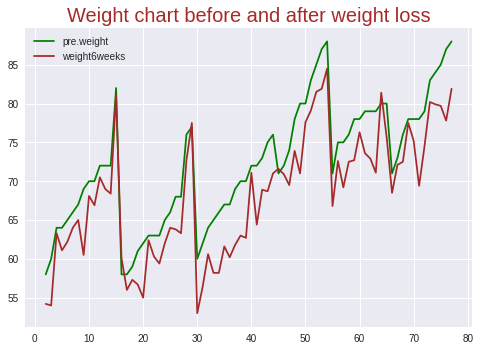

In [71]:
# Biểu đồ cân nặng trước và sau 6 tuần
plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
df[['pre.weight', 'weight6weeks']].plot(color= ['green',"brown"])
plt.title("Weight chart before and after weight loss",color="brown", fontsize=20)

# **Compute variable**
*Research question:* **Remove weight lost and get students to calculate it using before/after weights**

"Loại bỏ trọng lượng đã giảm và hãy tính toán nó bằng cách sử dụng cân nặng trước và sau"

In [72]:
# Phép tính đã được tính ở mục Paired t-test
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,thay_doi,Đã giảm
2,1,0.0,22,159,58,1,54.2,3.8,3.8
3,2,0.0,46,192,60,1,54.0,6.0,6.0
4,3,0.0,55,170,64,1,63.3,0.7,0.7
5,4,0.0,33,171,64,1,61.1,2.9,2.9
6,5,0.0,50,170,65,1,62.2,2.8,2.8
...,...,...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2,2.8,2.8
74,75,1.0,49,177,84,3,79.9,4.1,4.1
75,76,1.0,28,164,85,3,79.7,5.3,5.3
76,77,1.0,40,167,87,3,77.8,9.2,9.2


In [74]:
df['Đã giảm'].describe()

count    76.000000
mean      3.946053
std       2.505803
min      -2.100000
25%       2.300000
50%       3.700000
75%       5.650000
max       9.200000
Name: Đã giảm, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight lost')

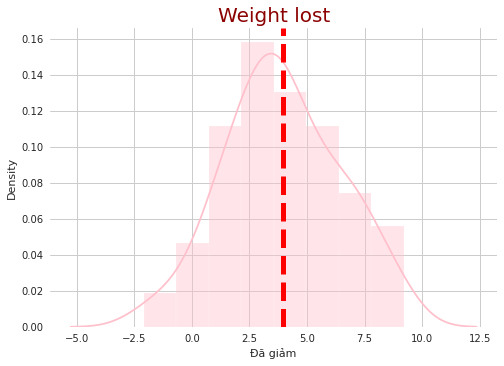

In [87]:
sns.set_style("whitegrid")
sns.distplot(df['Đã giảm'], color='pink')
plt.axvline(df['Đã giảm'].mean(), color="red", linestyle="dashed", linewidth=5)
plt.title('Weight lost', size=20, color='darkred')

# **Summarry statistics**

*Research question:* **Summarry statistics by diet**

"Thống kê tóm tắt theo chế độ ăn kiêng"

In [90]:
ssbd = df[['Diet', 'Đã giảm']]
ssbd

,Diet,Đã giảm
2,1,3.8
3,1,6.0
4,1,0.7
5,1,2.9
6,1,2.8
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


In [175]:
# Bảng tần số
diet = df.groupby('Diet')['Diet'].count()
diet = pd.DataFrame(diet)
diet.columns = ['Tần số']
diet['Phần trăm'] = diet/sum(diet['Tần số'])*100

In [179]:
diet

,Diet,Tần số,Phần trăm
0,1,24,31.578947
1,2,25,32.894737
2,3,27,35.526316


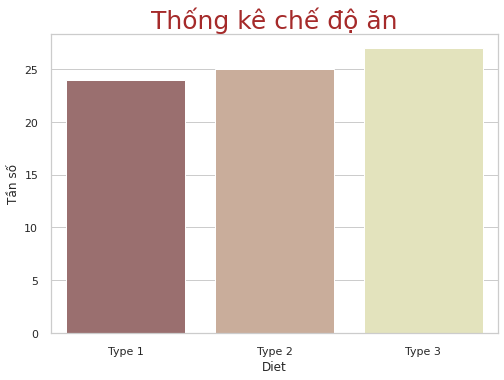

In [176]:
diet.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
ax =sns.barplot(x='Diet',y='Tần số',data = diet, palette='pink')
plt.title('Thống kê chế độ ăn', size=25, color='brown')
ax.set_xticklabels(["Type 1", "Type 2", "Type 3"])
plt.show()

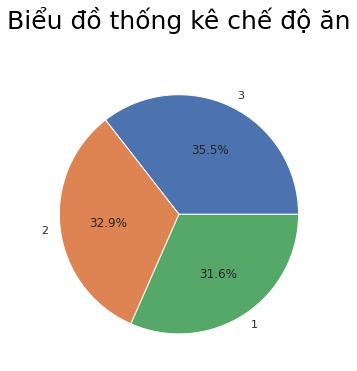

In [178]:
tn = df.Diet.value_counts()
engines = tn.index
counts = tn.values
x = counts.cumsum()/counts.sum()*100
plt.xticks(rotation=100)
plt.pie(counts[:5], labels = engines[:5], autopct="%1.1f%%")
plt.title("Biểu đồ thống kê chế độ ăn", color = "black", y = 1.1, fontsize = 25)
plt.show()

**Thống kê đơn giản với từng chế độ ăn bằng hàm describe**

In [210]:
# Lấy giá trị tương ứng ở cột Diet
di = ssbd.groupby('Diet').groups

type_1 = ssbd['Đã giảm'][di[1]]
type_1.name = 'Diet Type 1'

type_2 = ssbd['Đã giảm'][di[2]]
type_2.name = 'Diet Type 2'

type_3 = ssbd['Đã giảm'][di[3]]
type_3.name = 'Diet Type 3'

In [185]:
type_1.describe()

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
Name: Diet Type 1, dtype: float64

In [186]:
type_2.describe()

count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
Name: Diet Type 2, dtype: float64

In [187]:
type_3.describe()

count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
Name: Diet Type 3, dtype: float64

# **One way ANOVA**
*Research question:* **Which diet was best for losing weight?**

"Chế độ ăn kiêng nào là tốt nhất để giảm cân?"

**Xây dựng giả thuyết:**
$$H_{0}: \mu_{1} = \mu_{2} =\mu_{3}$$
$$H_{a}: \mu_{i} = \mu_{j} (i\ne j;  i, j\in \bar{1,3}) $$



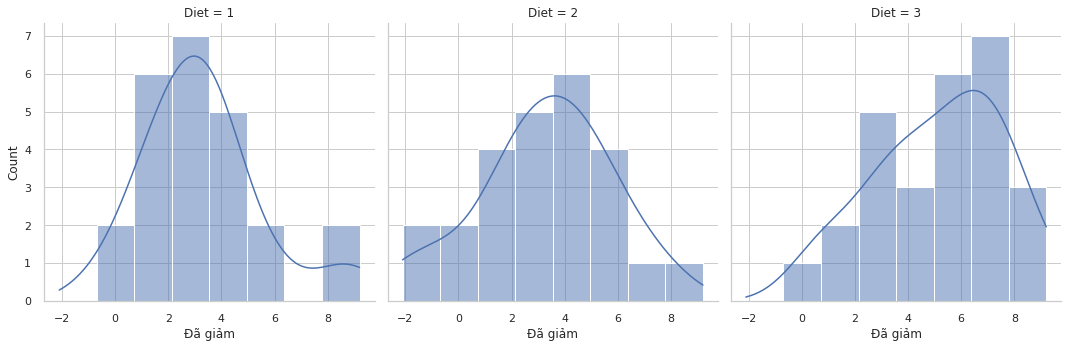

In [189]:
ax=sns.displot(data=ssbd,x='Đã giảm',col='Diet',kde=True)

In [260]:
# Kích thước của các mẫu không giống nhau nên ta lấy ngẫu nhiên 20 giá trị 
type1 = type_1.sample(20)
type2 = type_2.sample(20)
type3 = type_3.sample(20)

In [221]:
hntp = pd.DataFrame(data = {"TYPE 1": type1, "TYPE 2": type2, "TYPE 3": type3})
hntp.T


,2,3,4,7,8,9,10,11,12,13,...,63,65,67,68,70,72,73,74,75,76
TYPE 1,3.8,6.0,0.7,2.0,2.0,8.5,1.9,3.1,1.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYPE 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.9,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYPE 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9,3.5,2.8,4.5,2.8,4.1,5.3,9.2


**Kiểm tra xem các nhóm có thuộc phân phối chuẩn**

"Sử dụng Shapiro-Wilk test"



**Phát biểu giả thuyết :**



$$H_0 : \text{Các nhóm được lấy từ phân phối chuẩn}$$



$$H_a:\text{Các nhóm không được lấy từ phân phối chuẩn}$$ 

In [250]:
# Hàm kiểm định Shapiro và đồ thị phân phối
def shapiro_test(data):
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
    sns.distplot(data, ax=axes[0], color='red')
    plt.tight_layout()

    data = (data - data.mean()) / data.std()
    sm.qqplot(data,ax=axes[1], line='45')
    plt.tight_layout()
    fig.suptitle(data.name, size=18)

    stat, p = shapiro(data)
    print('Kiểm định Shapiro cho',data.name)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p < 0.05:
        print('Bác bỏ giả thiết H0')
        print('Các nhóm không tuân theo phân phối chuẩn - Không đủ điều kiện để phân tích tiếp')
        print("loại")
    else:
        print('Dữ liệu được lấy từ phân phối chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    print('-'*50)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kiểm định Shapiro cho Diet Type 1
stat=0.899, p=0.039
Bác bỏ giả thiết H0
Các nhóm không tuân theo phân phối chuẩn - Không đủ điều kiện để phân tích tiếp
loại
--------------------------------------------------


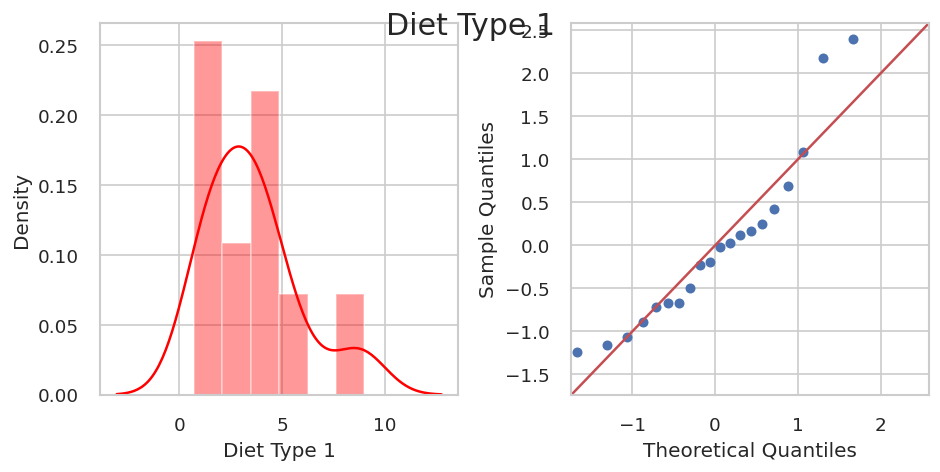

In [251]:
shapiro_test(type1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kiểm định Shapiro cho Diet Type 2
stat=0.970, p=0.760
Dữ liệu được lấy từ phân phối chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


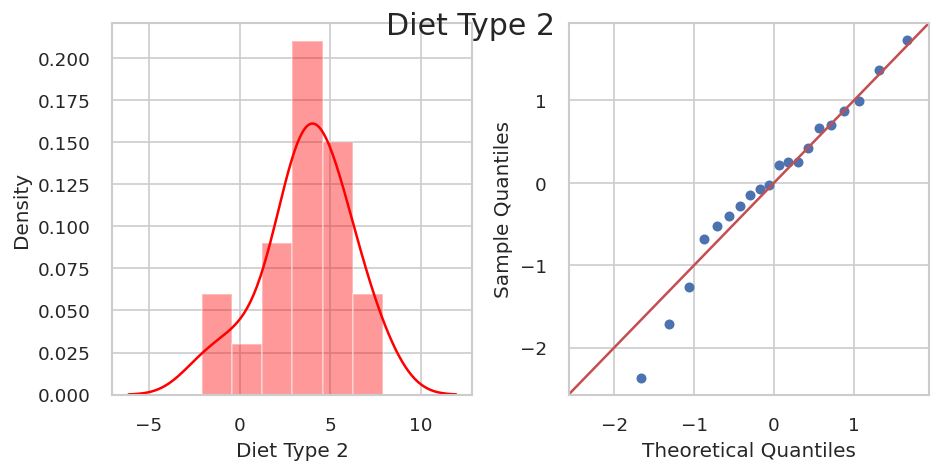

In [252]:
shapiro_test(type2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kiểm định Shapiro cho Diet Type 3
stat=0.960, p=0.372
Dữ liệu được lấy từ phân phối chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


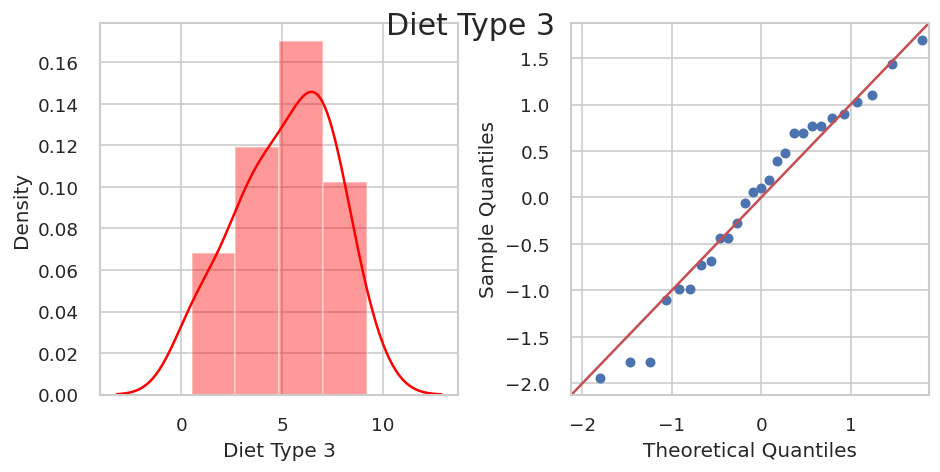

In [253]:
shapiro_test(type_3)

**Kết luận:** 
> Nhóm Diet type 1 dữ liệu không được lấy từ phân phối chuẩn

> Nhóm Diet type 2 và Diet type 3 dữ liệu được lấy từ phân phối chuẩn

**Bắt đầu tiến hành kiểm định tính thuần nhất của phương sai**

"Sử dụng Bartlett's Test"

**Phát biểu giả thuyết :**


$$H_0 : \text{Các nhóm có phương sai giống nhau}$$

$$H_a:\text{Các nhóm có phương sai không giống nhau}$$ 

In [264]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Có bằng chứng bác bỏ giả thuyết H0"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Không có bằng chứng bác bỏ  giả thuyết H0"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

p={}
from scipy.stats import bartlett
p['score'], p['p_value'] = bartlett(type1, type2, type3)
if p['p_value'] > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')
results(p)

Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


,score,p_value,KetLuan
,0.390267,0.822725,Không có bằng chứng bác bỏ giả thuyết H0


**Kiểm định ANOVA one way**

Phát biểu giả thuyết:

$$H_0 : \text{Các chế độ ăn có hiệu quả giảm cân giống nhau}$$

$$H_a:\text{Các chế độ ăn có hiệu quả giảm cân không giống nhau}$$ 

In [265]:
from scipy.stats import f_oneway
stats,p_value = st.f_oneway(type1, type2, type3)
print("p_value:",p_value)
if p_value < 0.05:
  print("Có bằng chứng bác bỏ giả thuyết H0")
else:
  print("Không có bằng chứng bác bỏ giả thuyết H0")

p_value: 0.021406610279588748
Có bằng chứng bác bỏ giả thuyết H0


**Chế độ ăn nào tốt nhất để giảm cân?**

In [266]:
Range = [type_1.max()-type_1.min(), type_2.max()-type_2.min(), type_3.max()-type_3.min()]
Std = [type_1.std(), type_2.std(), type_3.std()]
Name = ['1', '2', '3']
table = list(zip(Name, Range, Std))
table = pd.DataFrame(table)
table.columns = ['Type', 'Range', 'Std']
table

,Type,Range,Std
0,1,9.6,2.240148
1,2,10.0,2.464535
2,3,8.7,2.395568


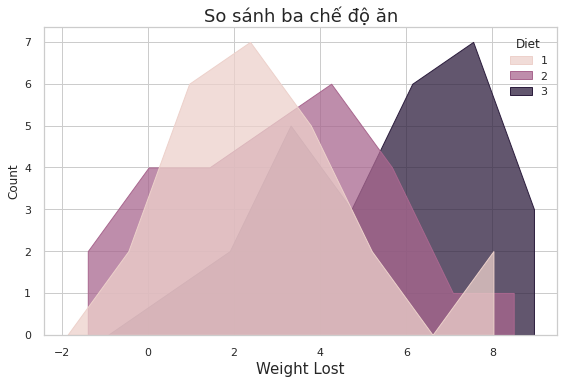

In [280]:
sns.histplot(df, x='Đã giảm', hue="Diet", element="poly",multiple='dodge')
plt.xlabel('Weight Lost',size=15)
plt.title('So sánh ba chế độ ăn', size=18)
plt.tight_layout()

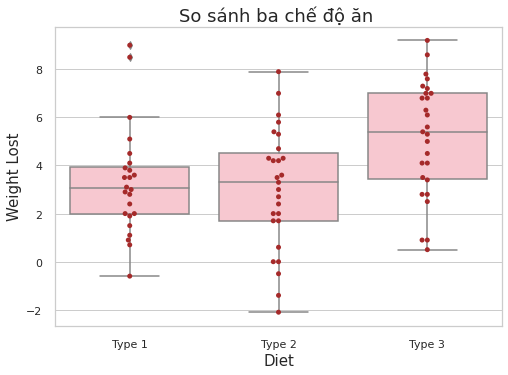

In [273]:
g=sns.boxplot(x='Diet', y='Đã giảm', data=df, color='pink')
sns.swarmplot(x="Diet", y="Đã giảm", data=df, color='brown')
plt.title('So sánh ba chế độ ăn ', size=18)
g.set_xticklabels(["Type 1", "Type 2", "Type 3"])
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Diet', size=15)
plt.show()

**Kết luận:**


> Nhìn bảng thống kê và hai biểu đồ ở trên, ta dễ dàng nhận thấy chế độ ăn Diet 3 có khoảng tin cậy lớn nhất, giá trị trung bình lớn nhất và độ lệch chuẩn tương đối nhỏ nên chế độ ăn thứ 3 có hiệu quả giảm cân tốt nhất.



# **One way ANOVA**
*Research question:* **Are there gender differences for weight lost?**

"Khả năng giảm cân có phụ thuộc vào giới tính hay không?"

https://www.statology.org/two-way-anova-python/